In [1]:
from numpy import *
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

*A liquid phase reaction (stoichiometry given below) needs to be processed in a continuous reactor system (operated isothermally)*
$$
A + P \rightarrow 2P
$$

Details on the reaction rate (based on component A) are given below:

 $\qquad \qquad \qquad$$-r_{A} =kC_{A}C_{B} \qquad $$ k = 1\dfrac{1L}{mol.min} \qquad $

A feed with $C_{A_{0}} = 1~\dfrac{mol}{L}$ and $C_{P_{0}} = 0.02~\dfrac{mol}{L}$ is fed to the reactor at a flow rate of $Q = 2.5~\dfrac{L}{min}$. A conversion of $A$ of $85\%$ is required.|

**a) Determine the volume of a single CSTR that will be required to achieve the desired conversion.**

In [2]:
k   =    1 #L/mol.min
CAo =    1 #mol/L
CPo = 0.02 #mol/L
Q   =  2.5 #L/min
X   = 0.85

CSTR design equation:
\begin{align}
F_{A_{0}} - F_{A} + r_{A}V &= 0 \nonumber \\
QC_{A_{0}} - QC_{A} &= -r_{A}V \nonumber \\
Q(C_{A_{0}} - C_{A_{0}}(1 - X)) &= -r_{A}V \nonumber \\
-r_{A} &= \dfrac{QC_{A_{0}}X}{V} \nonumber
\end{align}

Rate equation:
\begin{align}
r_{A} &= -kC_{A}C_{P} \nonumber \\
&= -kC_{A_{0}}(1 - X_{A})(C_{P_{0}} + CA_{0}X_{A}) \nonumber
\end{align}

In [3]:
rA = -k*CAo*(1 - X)*(CPo + CAo*X)
rA

-0.1305

In [4]:
V = Q*CAo*X/(-rA)
print('CSTR Volume = '+str(V)+' L')

CSTR Volume = 16.28352490421456 L


**b) Determine the volume of a single PFR that will be required to achieve the desired conversion**

PFR design equation:
\begin{align}
\dfrac{dF_{j}}{dV} &= r_{j} \nonumber \\
Q\dfrac{dC_{j}}{dV} &= r_{j} \nonumber
\end{align}

In [5]:
def PFR (C,V):
    CA, CP = C
    rA     = -k*CA*CP
    rP     = -rA
    dCAdV  = rA/Q
    dCPdV  = rP/Q
    return[dCAdV, dCPdV]

In [6]:
V = 13.8985
Vspan = linspace(0,V, 100) #keep changing volume until X=85%
init = [CAo, CPo]
sols = odeint(PFR, init, Vspan)

CA, CP = sols.T
X1 = (CAo - CA[-1])/CAo
X1

0.8500903455748962

So the Volume required for a PFR to achieve $85\%$ conversion is $13.9~L$

------------------------------------------------------------

**c) Determine the minimum total reactor volume required that will result in the desired conversion if you are allowed to use more than one reactor in series. Also specify the type of reactors used, the volume of each individual reactor and the sequence of the reactors that you suggest.**

In [7]:
xspan = linspace(0, 0.9999, 101)
rA1 = k*CAo*(1 - xspan)*(CPo + CAo*xspan)
rate = 1/rA1

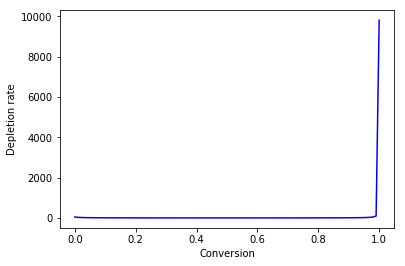

In [8]:
plt.figure(1)
plt.plot(xspan, rate, color='blue', label='-1/rA')
plt.ylabel('Depletion rate') 
plt.xlabel('Conversion') 
plt.show()

In [9]:
MaxRate = min(rate)
MaxRate

3.844675160442388

In [10]:
i = argmax(-rate==max(-rate))
Xmin = xspan[i]
Xmin

0.489951

From the above Levenspiel diagram, the best series reactors is a CSTR where the conversion is $48.51~\%$, followed by a PFR to $85~\%$ conversion. This will minimise the total volume required.

In [11]:
Xcstr  = Xmin
rAcstr = -k*CAo*(1 - Xcstr)*(CPo + CAo*Xcstr)
rAcstr

-0.260099997599

In [12]:
Vcstr = Q*CAo*Xcstr/(-rAcstr)
print('CSTR Volume = '+str(Vcstr)+' L')

CSTR Volume = 4.709256098834771 L


In [16]:
CAo1 = CAo*(1 - Xcstr)
CPo1 = (CPo + CAo*Xcstr)
CAo1

0.510049

In [17]:
(0.51-0.15)/0.51

0.5098039215686274

For $85\%$ overall conversion we know that $C_{A_{out}} = 0.15~mol/L$ therefore:
\begin{align}
X_{2} &= \dfrac{C_{A1_{0}} - C_{A_{out}}}{C_{A1_{0}}} \nonumber \\
&= \dfrac{0.51 - 0.15}{0.51} \nonumber \\
&= 0.51 \nonumber
\end{align}

In [23]:
Vpfr = 2.75
Vspan1 = linspace(0,Vpfr, 100) #keep changing volume until X=85%
init1 = [CAo1, CPo1]
sols1 = odeint(PFR, init1, Vspan1)

CA1, CP1 = sols1.T
X2 = (CAo1 - CA1[-1])/CAo1
X2

0.5086948593924991

In [24]:
# Total volume therefore:
Vtotal = Vcstr + Vpfr
Vtotal

7.459256098834771

Volume of the CSTR is $4.66~L$, volume of the PFR is $2.75~L$.

Total reactor volume required is $7.46~L$